In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Homework 6

## Austin Castelo

### (3)

In [2]:
A = np.array([[4.0,0.0,0.0],[0.0,4.0,0.0],[0.0,0.0,25.0]])
b = np.array([4.0,1.0,5.0])
print(A,b)
print("solution =" )
print([1,1/4,1/5])

[[ 4.  0.  0.]
 [ 0.  4.  0.]
 [ 0.  0. 25.]] [4. 1. 5.]
solution =
[1, 0.25, 0.2]


In [3]:
def conjugate_grad(A,b, tol = 0.001):
    n = len(b)
    x0 = np.random.rand(len(b))
    r0 = b-A.dot(x0)
    
    x = [x0  for i in range(n+1)]
    r  = [r0 for i in range(n+1)]
    v = [r0  for i in range(n+1)]
    
    t = np.ones(n+1)
    s = np.ones(n+1)
    k = 0
    
    while np.sqrt(np.inner(r[k],r[k])) > tol:
        t[k] = np.inner(r[k],r[k])/np.inner(v[k],A.dot(v[k]))
        x[k+1] = x[k] + t[k]*v[k]
        r[k+1] = r[k] - t[k]*(A.dot(v[k]))
        s[k+1] = np.inner(r[k+1],r[k+1])/np.inner(r[k],r[k])
        v[k+1] = r[k+1] + s[k+1]*v[k]
        k += 1
    print("The interations needed of for the conjugate gradient method is "+str(k))
    return x[k],r

In [4]:
def Jacobi(A, b, tol = 0.001):
    x = np.zeros(len(A)) 
    x_2 = x

    D = np.diag(A)

    R = A - np.diagflat(D)
    x = (b - np.dot(R,x)) / D
    k = 1
    while max(abs(x-x_2))/max(abs(x)) > tol:
        x_2 = np.array(x)
        x = (b - np.dot(R,x)) / D
        k += 1
    print(k)
    return x

In [5]:
sol = Jacobi(A,b)
sol

2


array([1.  , 0.25, 0.2 ])

In [6]:
sol,r = conjugate_grad(A,b)
sol

The interations needed of for the conjugate gradient method is 2


array([1.  , 0.25, 0.2 ])

In [7]:
def rhs(x):
    return 2*(np.pi**2)*np.sin(np.pi*x)
def c_func(x):
    return np.pi**2*(x+1)/(x+1)

In [8]:
def A_b(N,x):
    h = 1/N    
    A = np.array([np.zeros_like(x)])
    A[0][0] = 2/(h**2) + c_func(x[0])
    A[0][1] = -1/(h**2)
    for i in range(1,len(x)-1):
        A = np.insert(A,i, [np.zeros_like(x)],axis = 0)
        A[i][i-1] = -1/(h**2)
        A[i][i] = 2/(h**2) + c_func(x[i])
        A[i][i+1] = -1/(h**2)
    A = np.insert(A,i+1, [np.zeros_like(x)],axis = 0)
    A[-1][-1] = 2/(h**2) + c_func(x[-1])
    A[-1][-2] = -1/(h**2)
    d = rhs(x)
    return A,d

In [11]:
def graph(N):
    x = np.linspace(0,1, N+1)
    x = x[1:-1]
    A,b = A_b(N,x)
    sol, r = conjugate_grad(A,b)
    sol2 = Jacobi(A,b)
    sol = np.insert(sol, 0, 0)
    sol = np.append(sol, 0)
    sol2 = np.insert(sol2, 0, 0)
    sol2 = np.append(sol2, 0)
    x = np.insert(x, 0, 0)
    x = np.append(x, 1)
    fun = np.sin(np.pi*x)
    print("error of conjugate gradient decent: "+ str(np.sqrt(np.inner(fun-sol, fun-sol))))
    print("error of Jacobi method: "+ str(np.sqrt(np.inner(fun-sol2, fun-sol2))))
    %matplotlib widget
    plt.figure(figsize=(13,8) , facecolor= 'w')
    plt.plot(x,sol, '--b', linewidth = 3)
    plt.plot(x,sol2, '--r', linewidth = 3)
    plt.plot(x,fun, '*k', markersize = 10)
    plt.grid(linewidth = 2)
    plt.legend(labels = ['CG', 'Jacobi', 'Function'])
    plt.plot()
    plt.show()
    R = [np.sqrt(np.inner(k,k)) for k in r]
    plt.figure(figsize=(30,15) , facecolor= 'w')
    plt.plot(np.linspace(1,len(r),len(r)), R)
    plt.show()

In [12]:
graph(50)

The interations needed of for the conjugate gradient method is 49
406
error of conjugate gradient decent: 0.0008224940857864033
error of Jacobi method: 1.0062430517338703


FigureCanvasNbAgg()

FigureCanvasNbAgg()

The interations needed of for the conjugate gradient method is 99
696
error of conjugate gradient decent: 0.00029078839938085434
error of Jacobi method: 3.5575589813936035


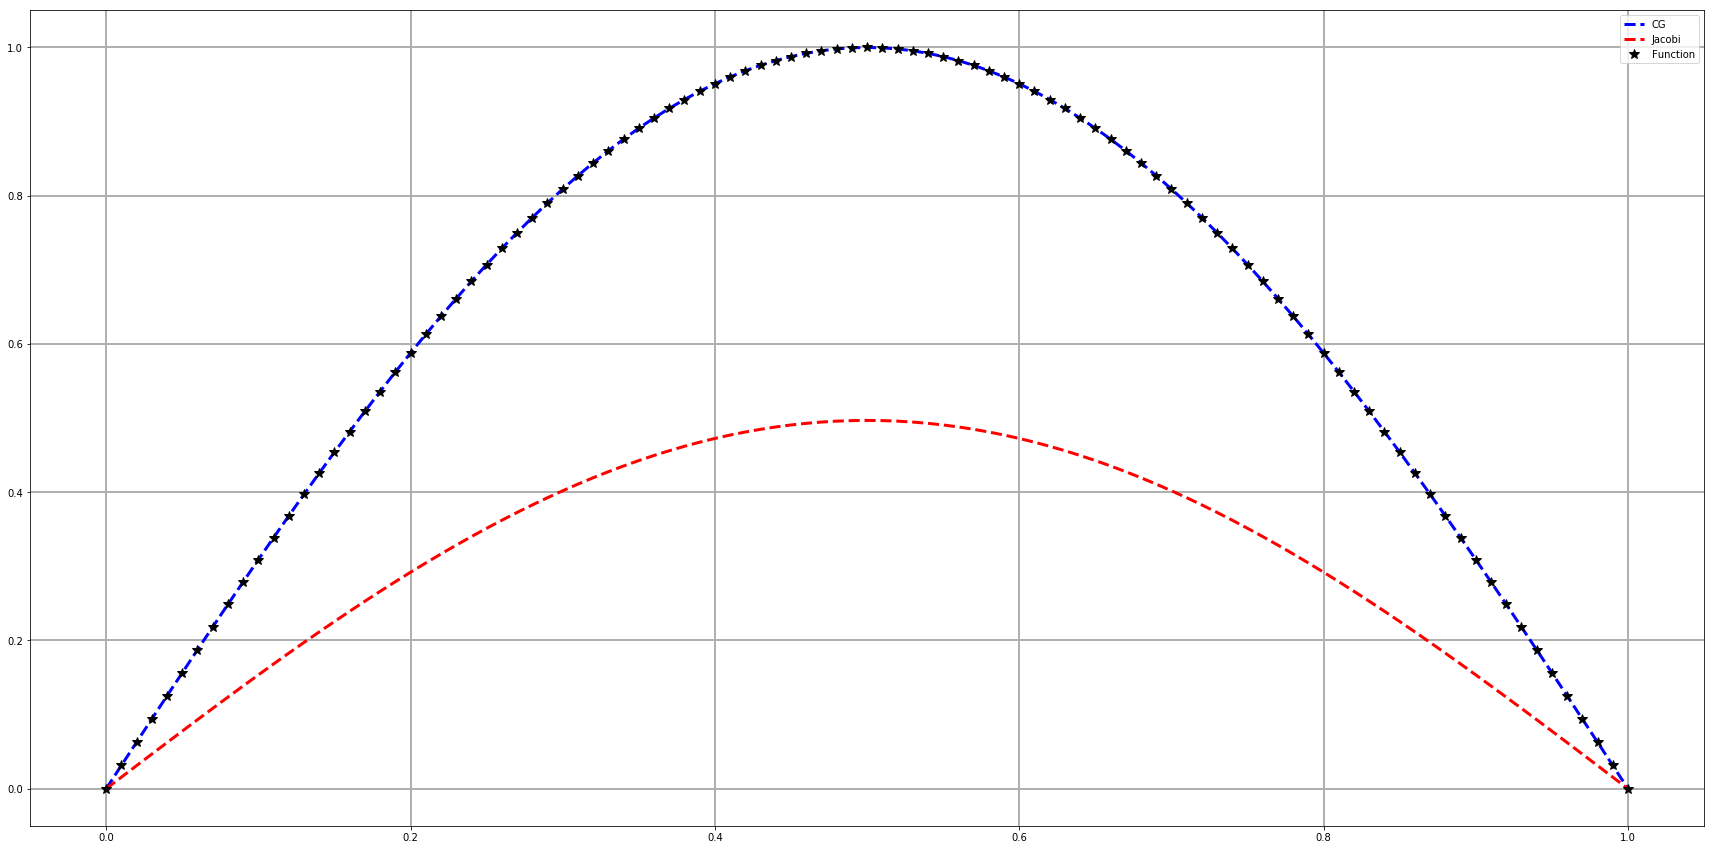

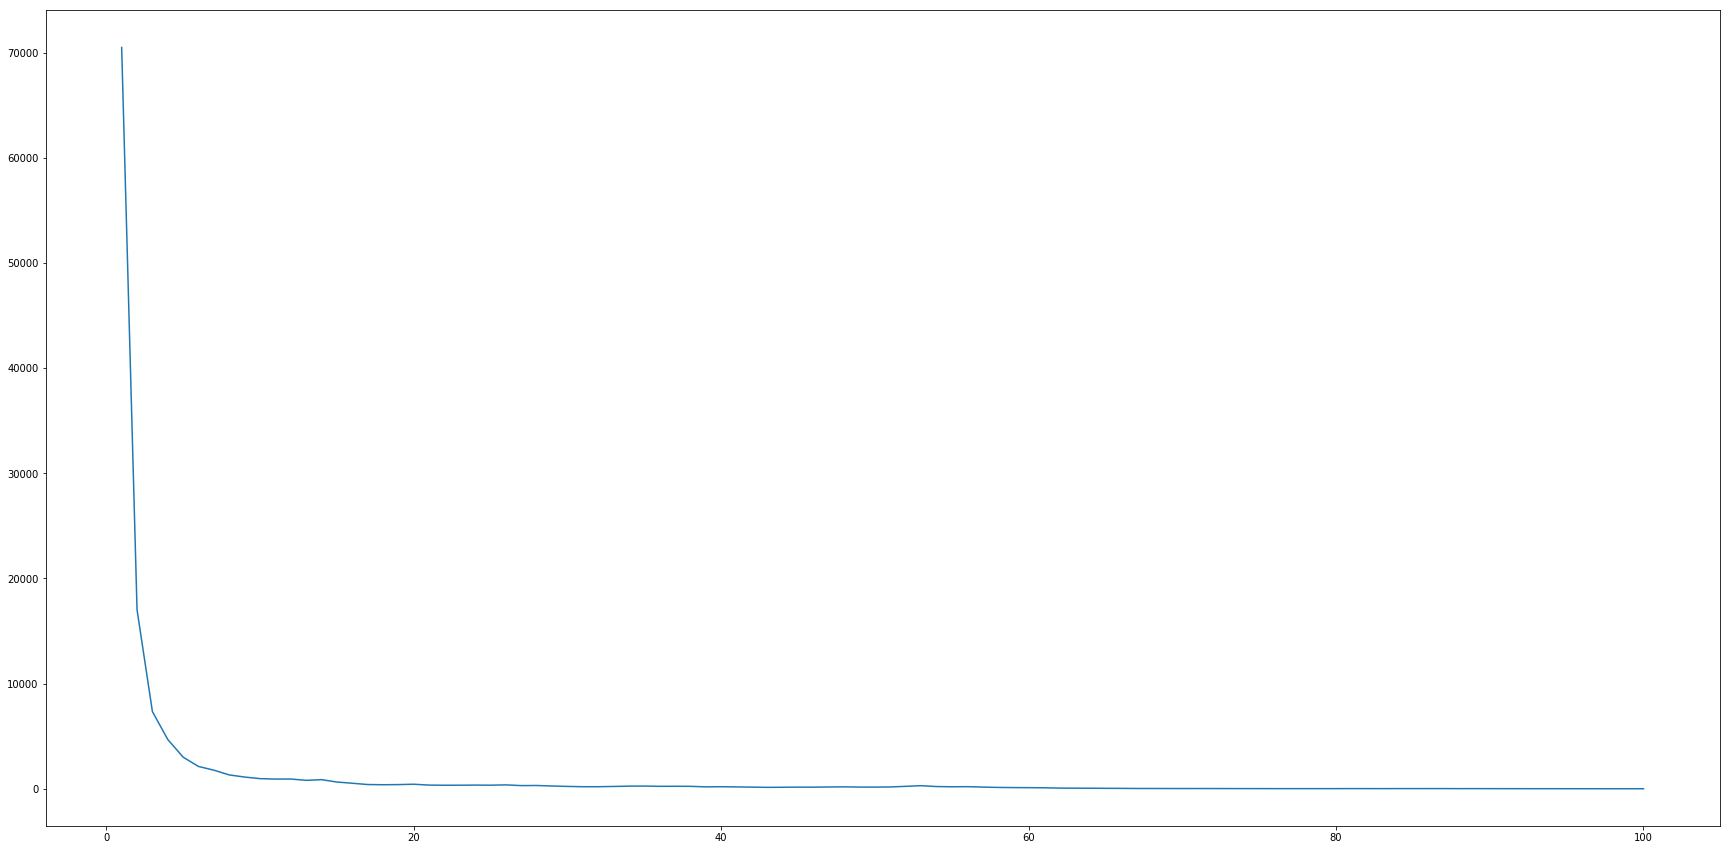

In [11]:
graph(100)

The interations needed of for the conjugate gradient method is 199
894
error of conjugate gradient decent: 0.00010280859158517253
error of Jacobi method: 8.020487168358136


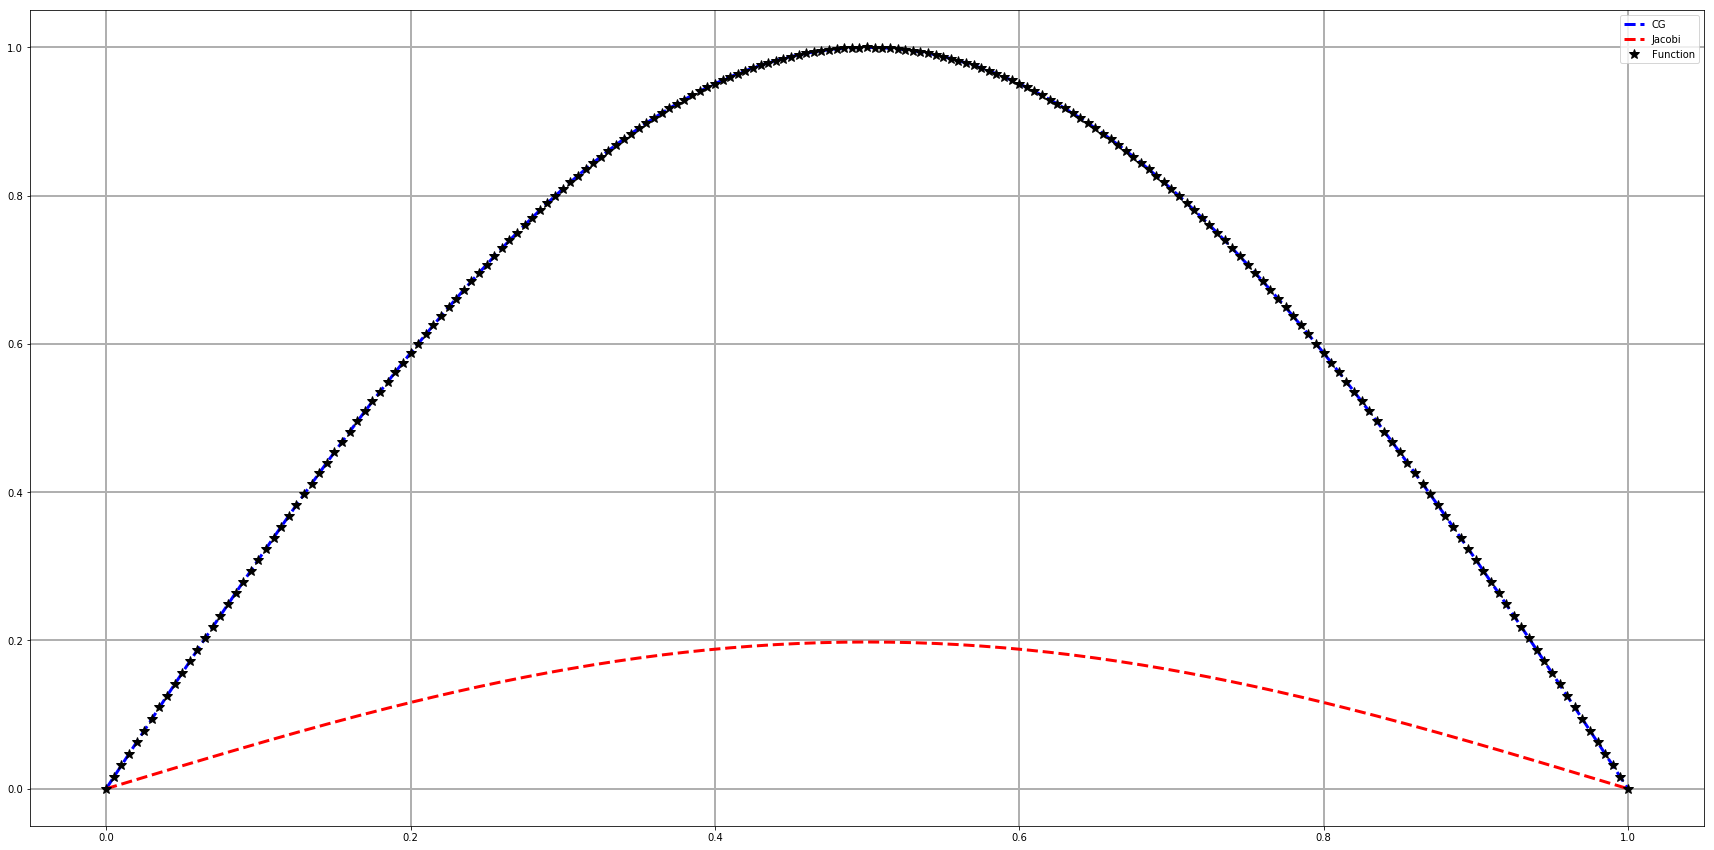

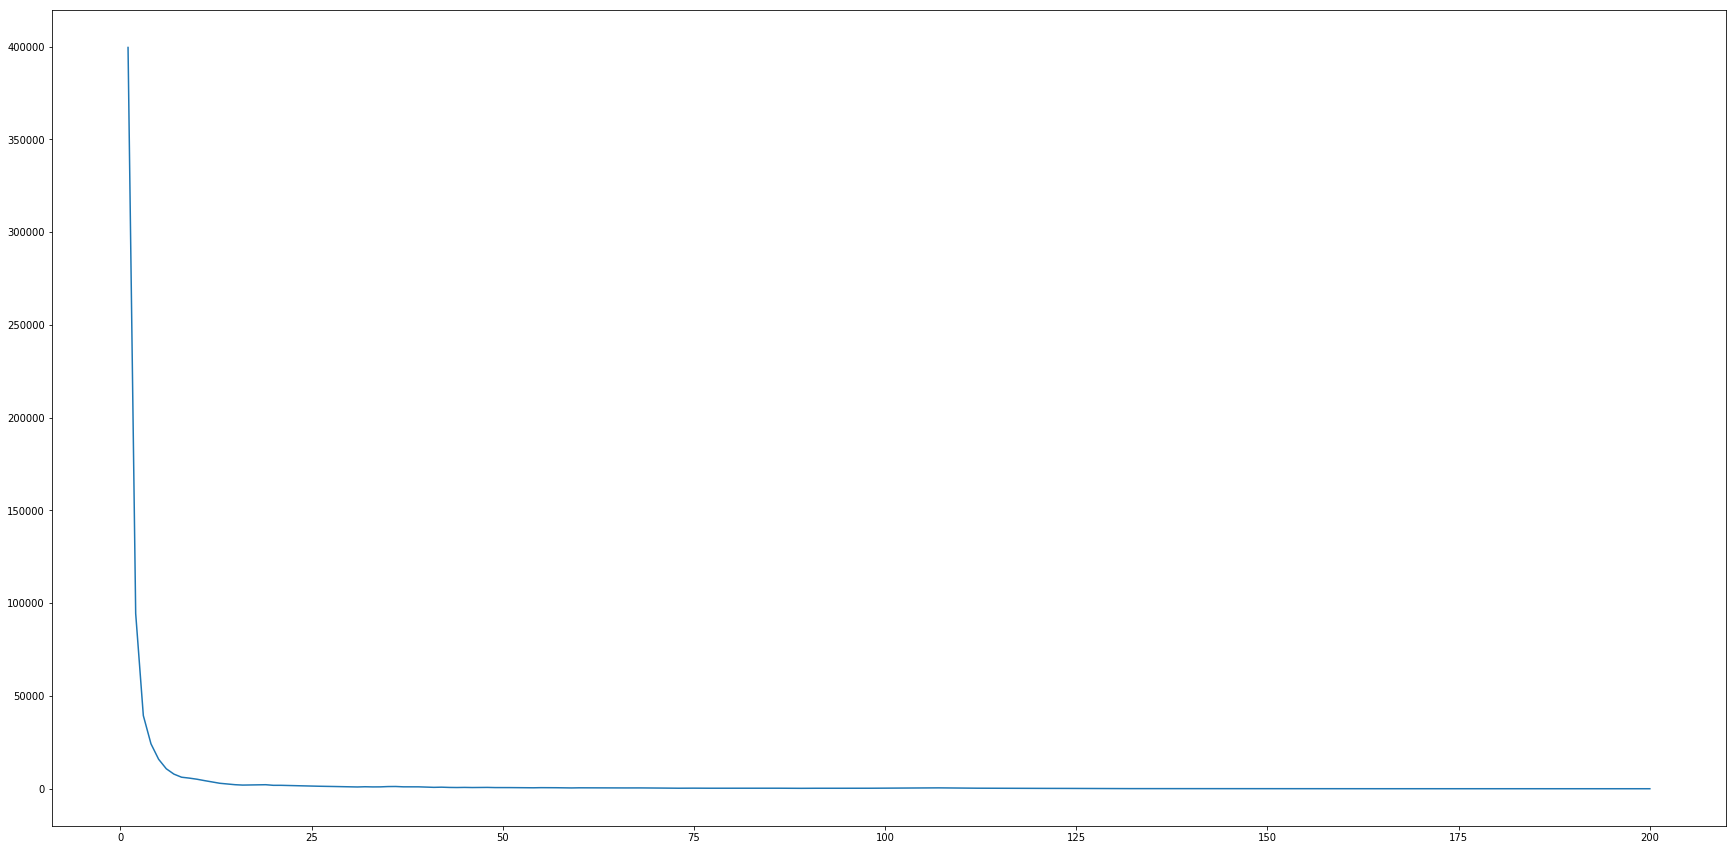

In [12]:
graph(200)

As we can see the conjugate gradient method converges to the actual function significantly faster than the Jacobi method for $N=[50,100,200]$. As we can also see the interations needed for conjugate gradient method is N-1. Also we can see the residuals of the conjugate gradient method for $N=[50,100,200]$ decrease significantly with the first 10 iterations.